In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt     
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
hc=pd.read_csv(r"C:\Users\HP\Downloads\ML Project - Random Forest Hotel Cancellation Prediction Analysis 16955485770.csv")

In [4]:
hc.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [5]:
hc.shape

(119390, 32)

In [6]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hc.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
(hc.isnull().mean())*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [9]:
hc.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
hc["children"].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [11]:
hc["children"]=hc["children"].fillna(hc["children"].median())

In [12]:
hc["country"]=hc["country"].fillna(hc["country"].mode()[0])

In [13]:
hc["agent"]=hc["agent"].apply(lambda x: np.random.choice(hc["agent"].dropna().values) if pd.isnull(x) else x)

In [14]:
hc["company"]=hc["company"].apply(lambda x: np.random.choice(hc["company"].dropna().values) if pd.isnull(x) else x)

In [15]:

hc["hotel"].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

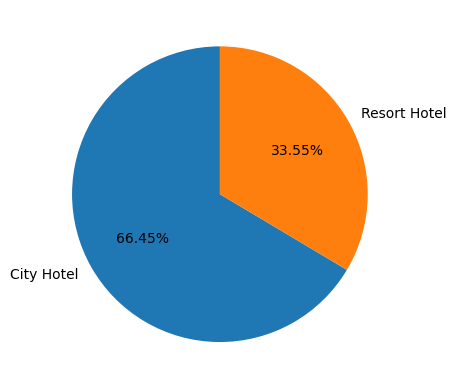

In [16]:
# hotel types
size = [79330,40060]
labels=["City Hotel","Resort Hotel"]
plt.pie(x=size,labels=labels,startangle=90,autopct="%0.2f%%")
plt.show()

In [17]:
hc["is_canceled"].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

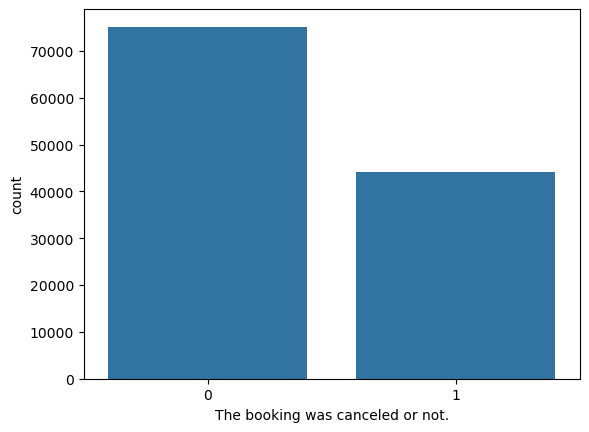

In [18]:
# how many booking  are canceled or not 
sns.countplot(data=hc,x="is_canceled")
plt.xlabel("The booking was canceled or not.")
plt.show()

In [19]:
hc["arrival_date_year"].value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

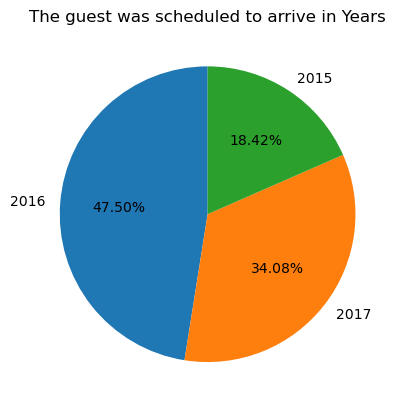

In [20]:
# The guest was scheduled to arrive in Years
size = [56707,40687,21996]
labels=[2016,2017,2015]
plt.pie(x=size,labels=labels,startangle=90,autopct="%0.2f%%")
plt.title("The guest was scheduled to arrive in Years")
plt.show()

In [21]:
hc["arrival_date_month"].value_counts()

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

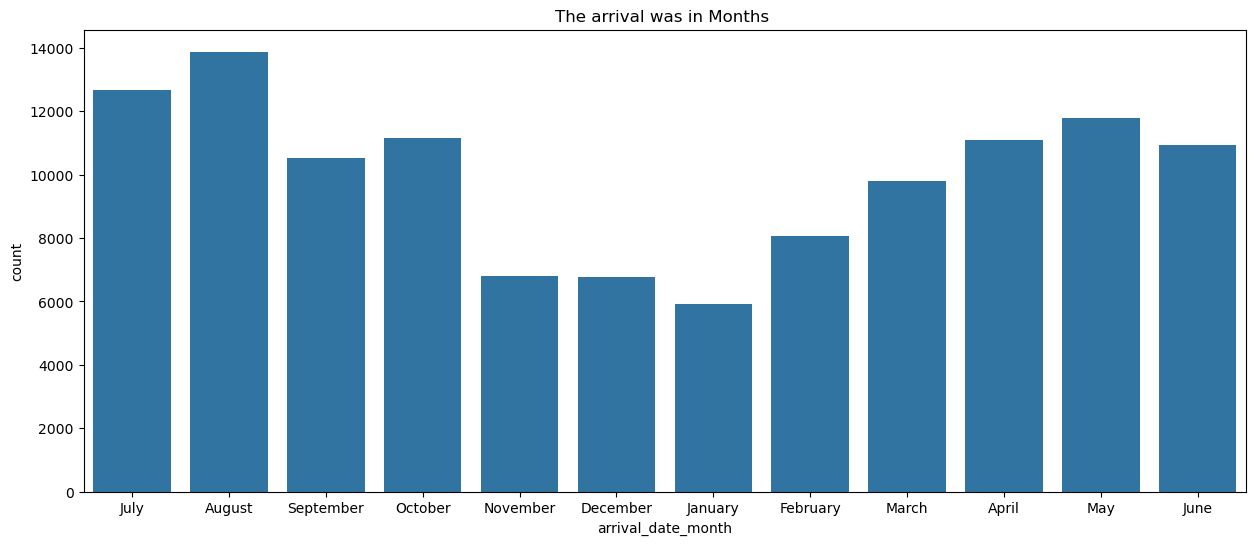

In [22]:
#The arrival was in Months

plt.figure(figsize=[15,6])
sns.countplot(data=hc,x="arrival_date_month")
plt.title("The arrival was in Months ")
plt.show()

In [23]:
hc["arrival_date_week_number"]

0         27
1         27
2         27
3         27
4         27
          ..
119385    35
119386    35
119387    35
119388    35
119389    35
Name: arrival_date_week_number, Length: 119390, dtype: int64

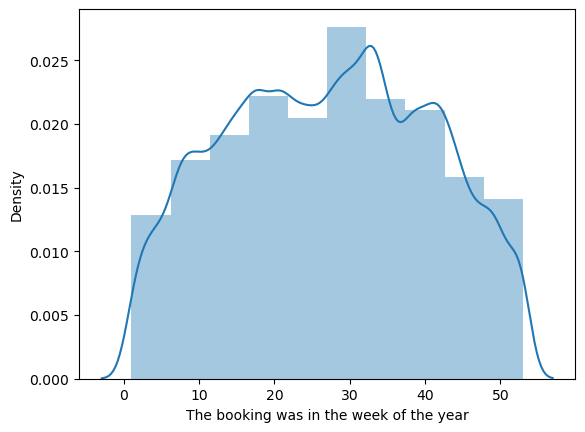

In [24]:
# Mostly Guest Do Boking Week In thet Years
sns.distplot(x=hc["arrival_date_week_number"],bins=10,norm_hist=True)
plt.xlabel("The booking was in the week of the year")
plt.show()

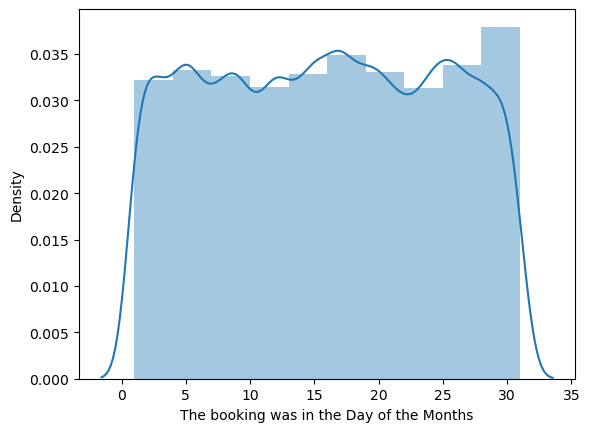

In [25]:
# Mostly Guest Do Boking days In the Month
sns.distplot(x=hc["arrival_date_day_of_month"],bins=10,norm_hist=True)
plt.xlabel("The booking was in the Day of the Months")
plt.show()

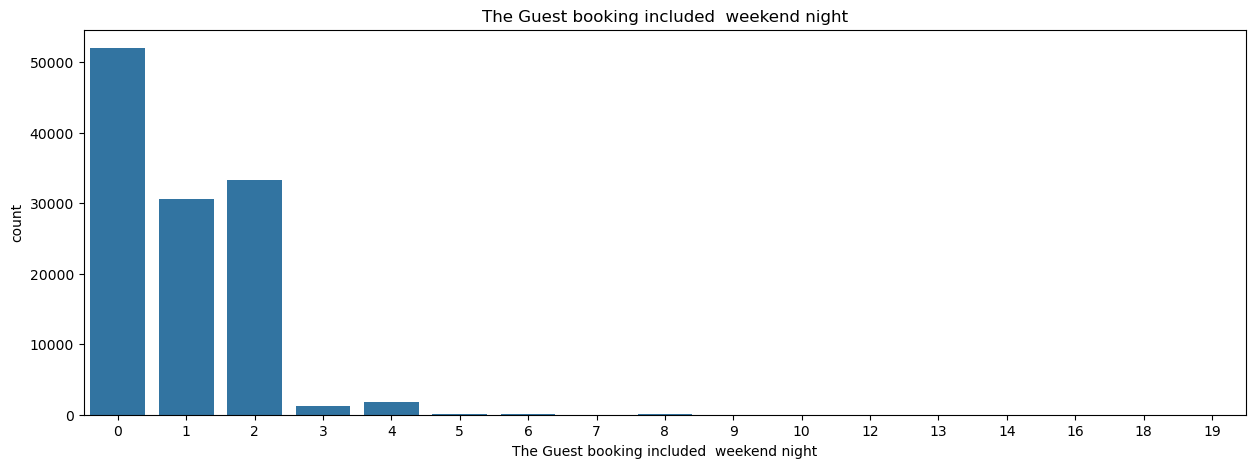

In [26]:
#The Guest booking included  weekend night
plt.figure(figsize=[15,5])

sns.countplot(data=hc,x="stays_in_weekend_nights")
plt.xlabel("The Guest booking included  weekend night")
plt.title("The Guest booking included  weekend night")
plt.show()



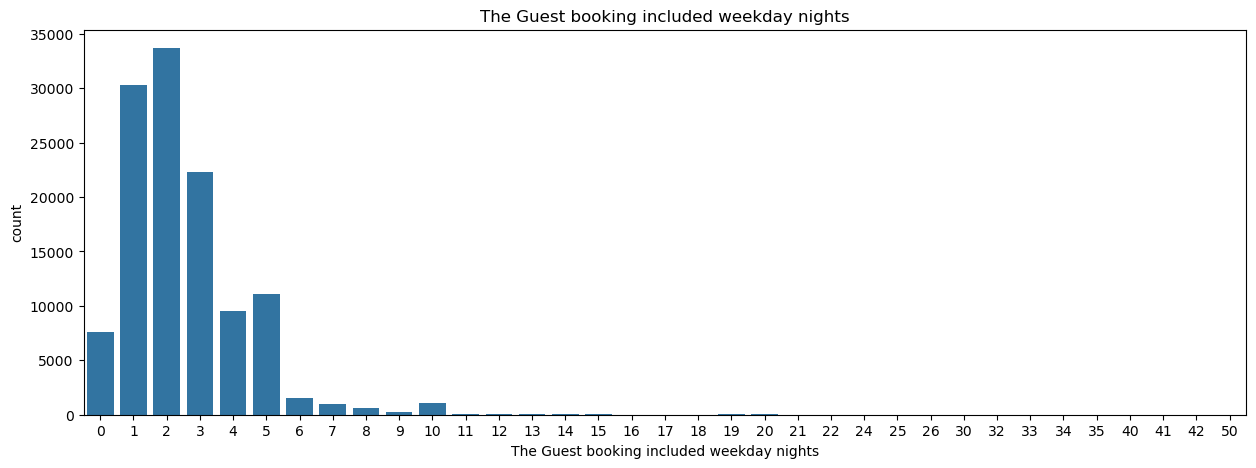

In [27]:
#The Guest booking included weekday nights

plt.figure(figsize=[15,5])

sns.countplot(data=hc,x="stays_in_week_nights")
plt.xlabel("The Guest booking included weekday nights")
plt.title("The Guest booking included weekday nights")
plt.show()

In [28]:
hc["adults"].value_counts()

adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

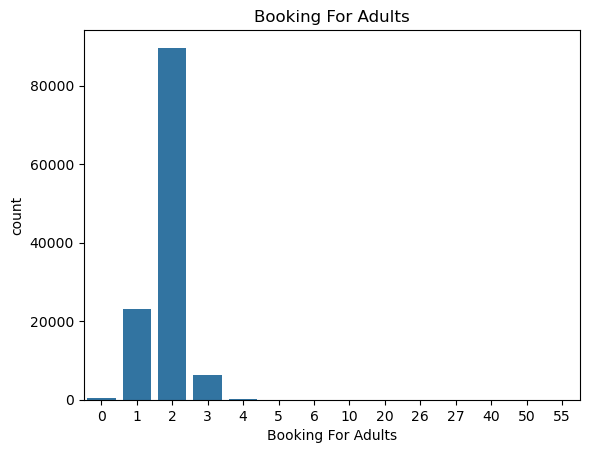

In [29]:
#here you can easy to analysis most booking for couples 

sns.countplot(data=hc,x="adults")
plt.xlabel("Booking For Adults")
plt.title("Booking For Adults")
plt.show()

In [30]:
hc["children"].value_counts()

children
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

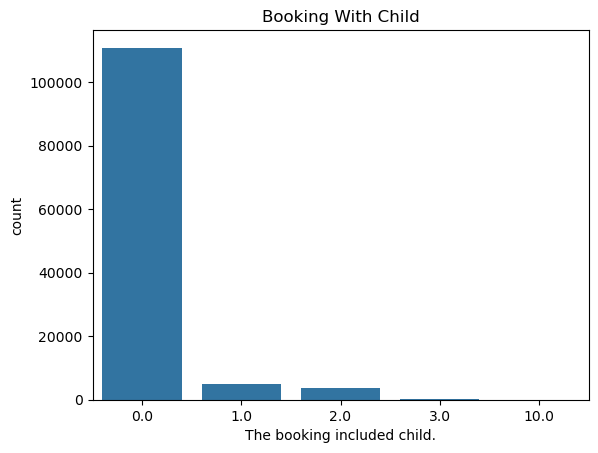

In [31]:
#here easy to analysis more booking happend for single couples (they does't have child)
sns.countplot(data=hc,x="children")
plt.xlabel("The booking included child.")
plt.title("Booking With Child")
plt.show()

In [32]:
hc["babies"].value_counts()

babies
0     118473
1        900
2         15
10         1
9          1
Name: count, dtype: int64

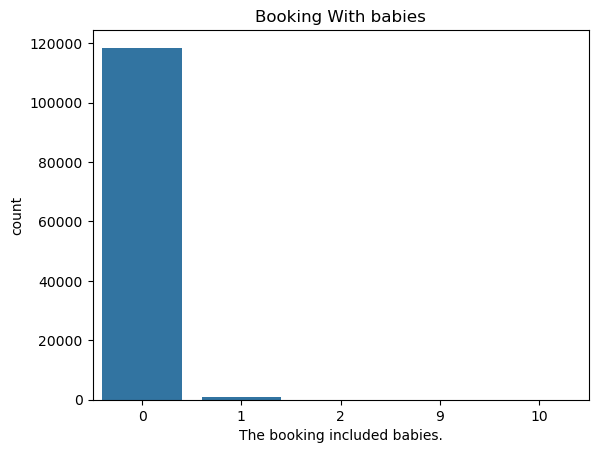

In [33]:
#here easy to analysis more booking happend for single couples (they does't have babies)

sns.countplot(data=hc,x="babies")
plt.xlabel("The booking included babies.")
plt.title("Booking With babies")
plt.show()

In [34]:
hc["meal"].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

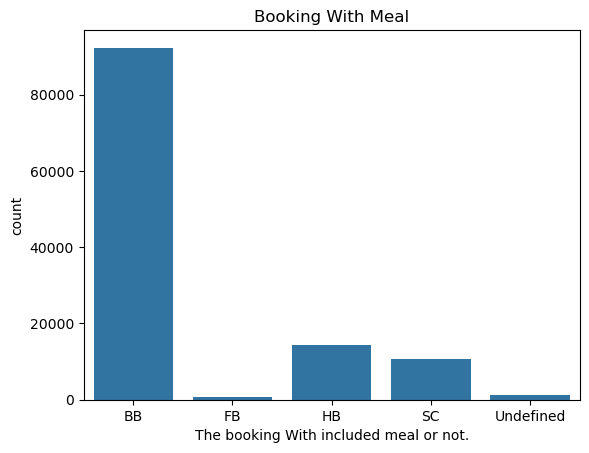

In [35]:
#BB (Bed & Breakfast): Breakfast is included in the booking.
#HB (Half Board): Breakfast and one additional meal (usually dinner) are included.
#SC (Self-Catering): No meals are included.
#Undefined: Meal preference is not specified or not applicable.
#FB (Full Board): All three main meals (breakfast, lunch, and dinner) are included.

#here most guests are prefer Breakfast Only

sns.countplot(data=hc,x="meal")
plt.xlabel("The booking With included meal or not.")
plt.title("Booking With Meal")
plt.show()

In [37]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [38]:
hc['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [39]:
hc["market_segment"].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

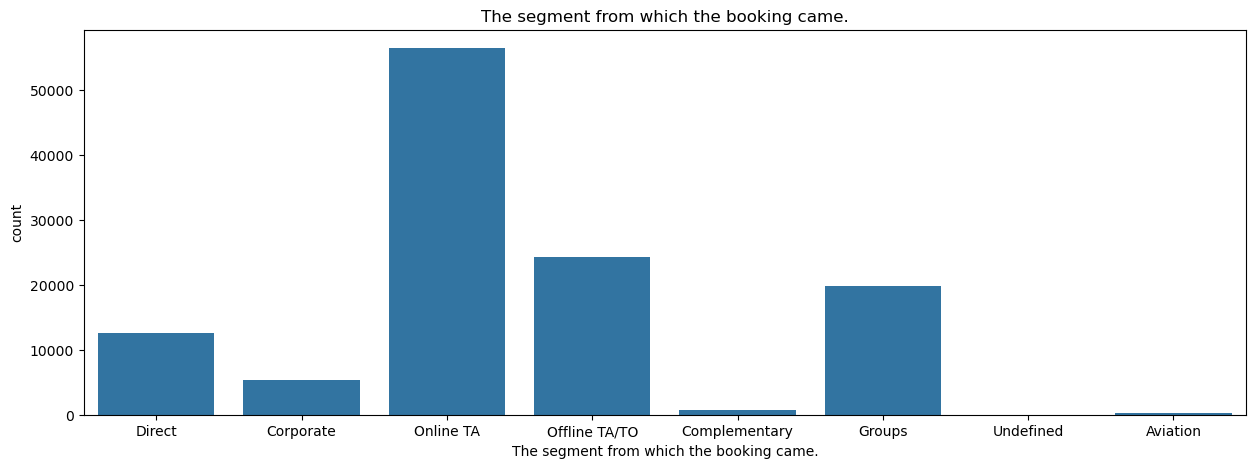

In [40]:
#here most of booking happend through Online TA and Offline TA
plt.figure(figsize=[15,5])
sns.countplot(data=hc,x="market_segment")
plt.xlabel("The segment from which the booking came.")
plt.title("The segment from which the booking came.")
plt.show()

In [41]:
hc["distribution_channel"].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

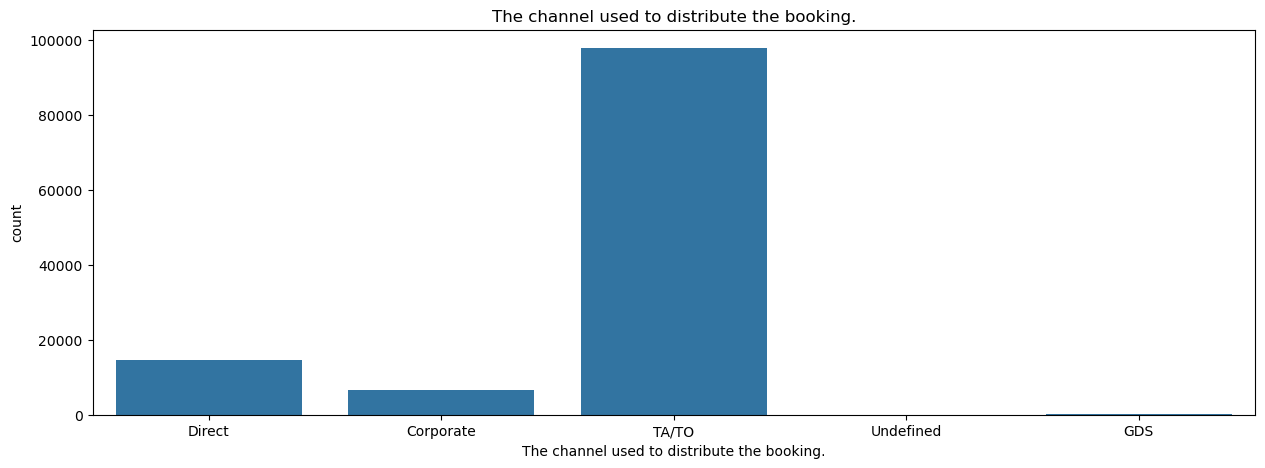

In [42]:
#here most of booking happend through Travel Agent/Tour Operator
plt.figure(figsize=[15,5])
sns.countplot(data=hc,x="distribution_channel")
plt.xlabel("The channel used to distribute the booking.")
plt.title("The channel used to distribute the booking.")
plt.show()

In [44]:
hc["is_repeated_guest"].value_counts()

is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64

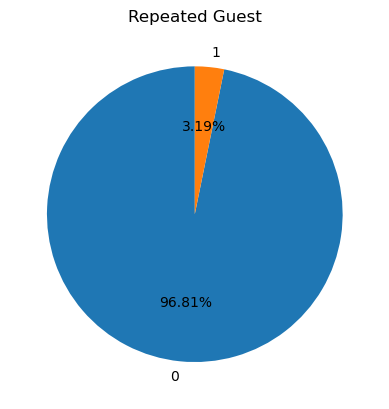

In [47]:
#very Low people are repeated

size = [115580,3810]
labels=[0,1]
plt.pie(x=size,labels=labels,startangle=90,autopct="%0.2f%%")
plt.title("Repeated Guest")
plt.show()

In [49]:
hc["previous_cancellations"].value_counts()

previous_cancellations
0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: count, dtype: int64

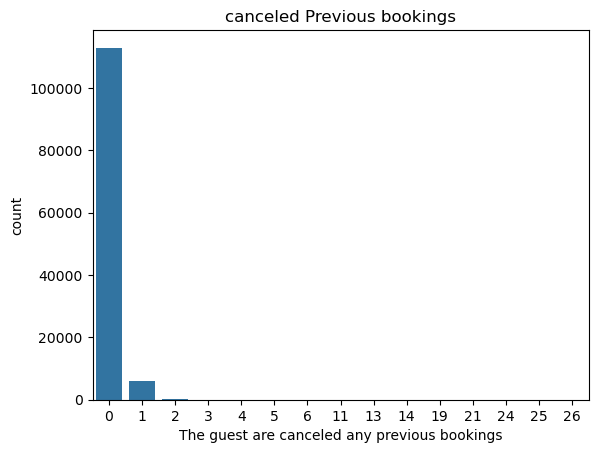

In [51]:
# here most guest are not cancellaed any booking 
sns.countplot(data=hc,x="previous_cancellations")
plt.xlabel("The guest are canceled any previous bookings")
plt.title("canceled Previous bookings")
plt.show()

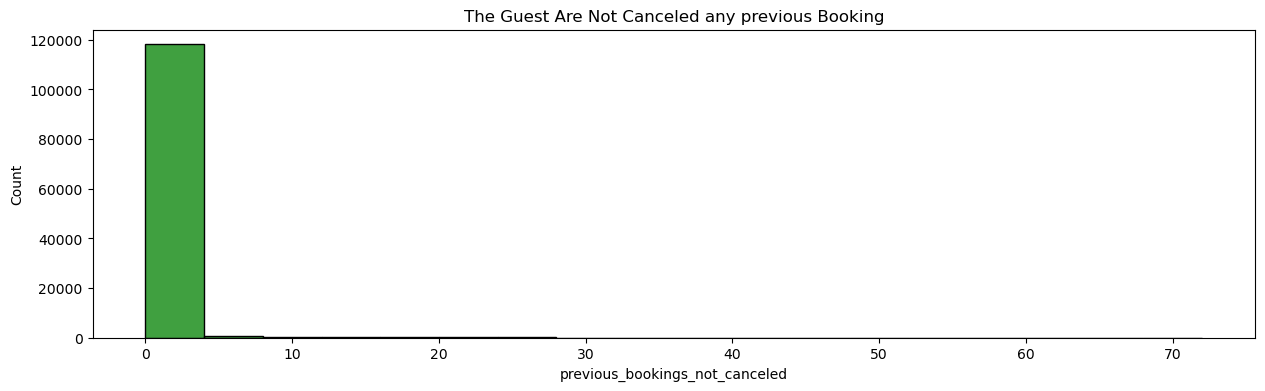

In [55]:
# again not canceled previous booking
plt.figure(figsize=[15,4])
sns.histplot(data=hc,x='previous_bookings_not_canceled',color="g")
plt.title("The Guest Are Not Canceled any previous Booking")
plt.show()

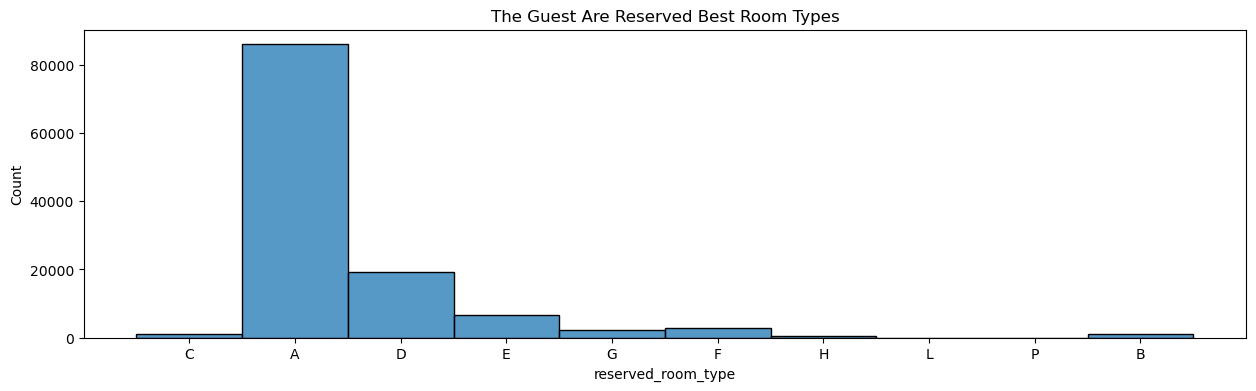

In [58]:
#here Mostly Room Type A Prefferd 

plt.figure(figsize=[15,4])
sns.histplot(data=hc,x='reserved_room_type')
plt.title("The Guest Are Reserved Best Room Types")
plt.show()

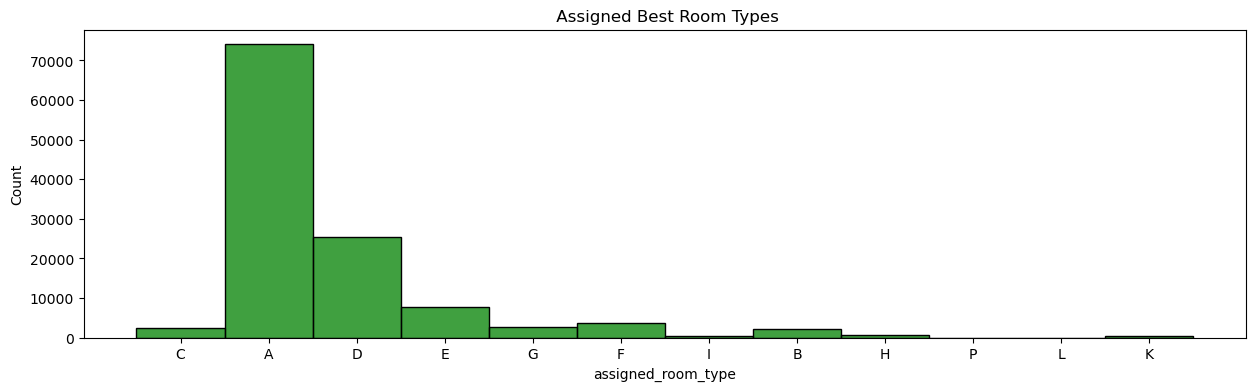

In [59]:
#here Mostly Room Type A Prefferd 

plt.figure(figsize=[15,4])
sns.histplot(data=hc,x='assigned_room_type',color="g")
plt.title(" Assigned Best Room Types")
plt.show()

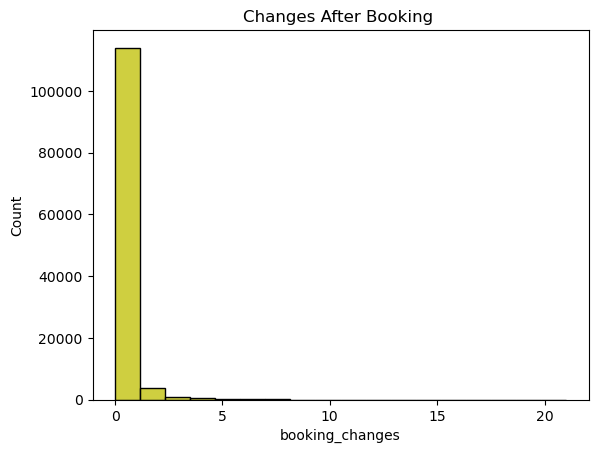

In [60]:
#changes after booking rooms 

sns.histplot(data=hc,x='booking_changes',color="y")
plt.title("Changes After Booking ")
plt.show()

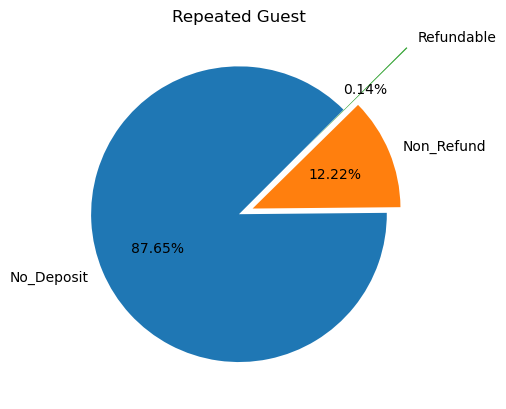

In [61]:
# here mostly guest are not give deposit amount and very lees guest used refundable type

size = [104641,14587,162]
labels=["No_Deposit","Non_Refund","Refundable"]
plt.pie(x=size,labels=labels,startangle=45,autopct="%0.2f%%",explode=[0,0.1,0.6])
plt.title("Repeated Guest")
plt.show()

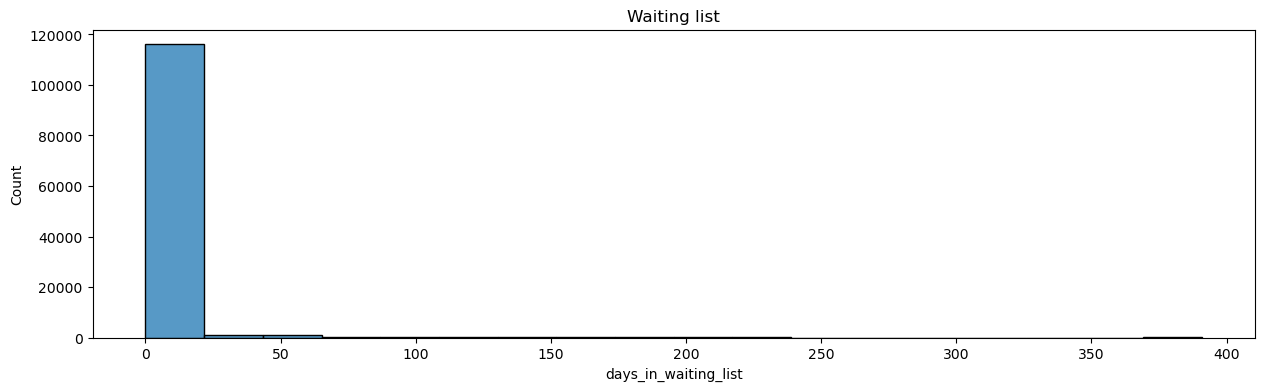

In [62]:
# there one waiting days  mostly
plt.figure(figsize=[15,4])
sns.histplot(data=hc,x="days_in_waiting_list")
plt.title("Waiting list")
plt.show()

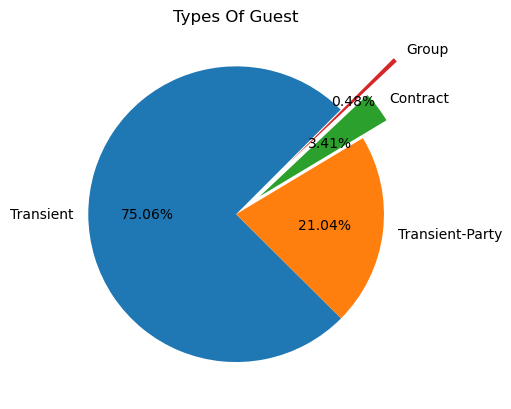

In [63]:
# here mostly guest are do booking individual
size = [89613,25124,4076,577]
labels=["Transient","Transient-Party","Contract","Group"]
plt.pie(x=size,labels=labels,startangle=45,autopct="%0.2f%%",explode=[0,0,0.2,0.5])
plt.title("Types Of Guest")
plt.show()

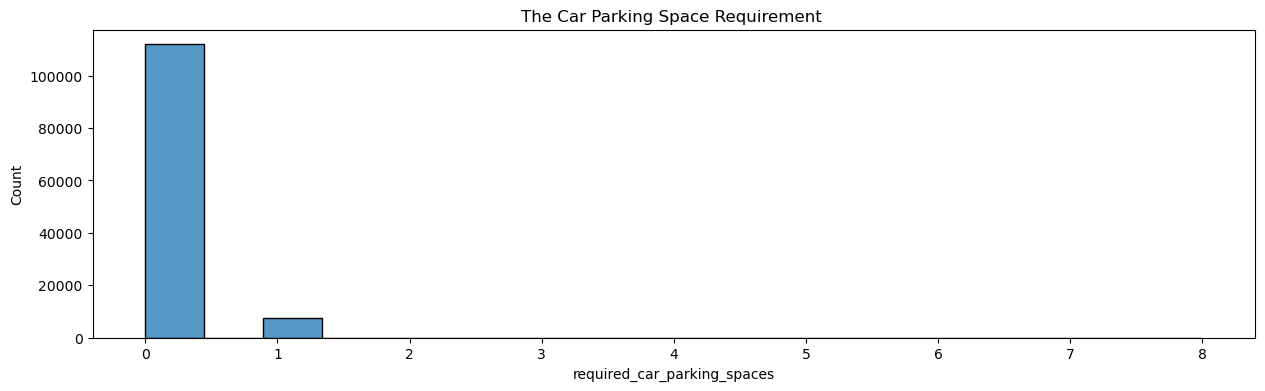

In [64]:
plt.figure(figsize=[15,4])
sns.histplot(data=hc,x="required_car_parking_spaces")
plt.title("The Car Parking Space Requirement ")
plt.show()

In [65]:
hc["total_of_special_requests"].value_counts()

total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: count, dtype: int64

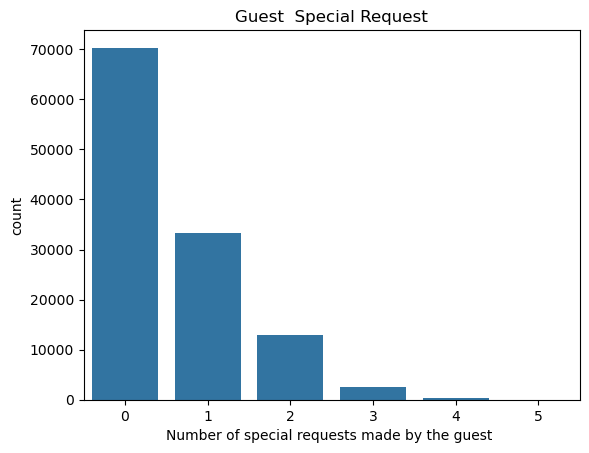

In [66]:
#Number of special requests made by the guest 
sns.countplot(data=hc,x="total_of_special_requests")
plt.xlabel("Number of special requests made by the guest ")
plt.title("Guest  Special Request")
plt.show()

In [67]:
hc["reservation_status"].value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

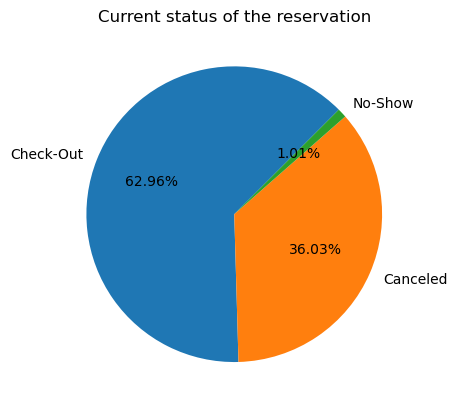

In [68]:
#Current status of the reservation
size = [75166,43017,1207]
labels=["Check-Out","Canceled","No-Show"]
plt.pie(x=size,labels=labels,startangle=45,autopct="%0.2f%%")
plt.title("Current status of the reservation")
plt.show()

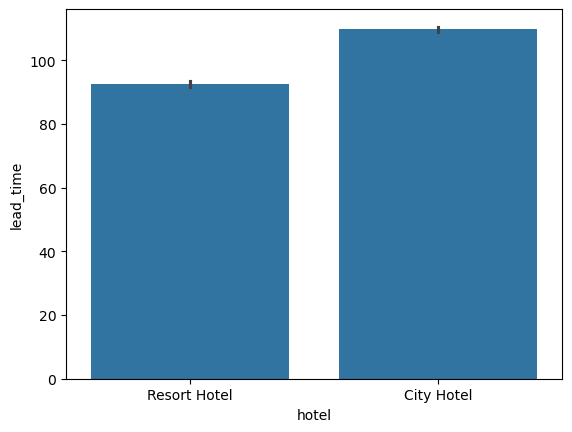

In [69]:
# max Advances Book in city and resort is up to 100days
sns.barplot(data=hc,x="hotel",y="lead_time")
plt.show()

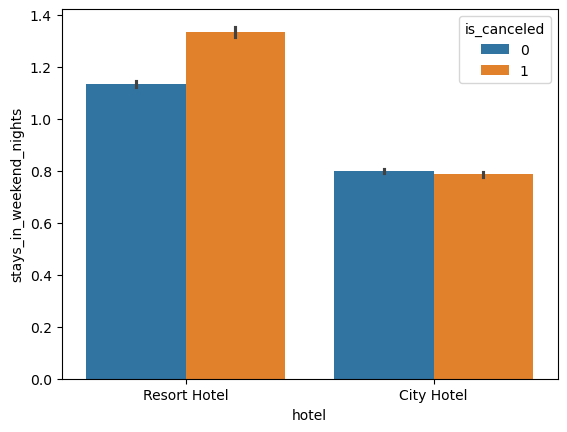

In [70]:
#Guest Preffered Resort hotel more and canceled ratio little more in city hotel
sns.barplot(data=hc,x="hotel",y="stays_in_weekend_nights",hue="is_canceled")
plt.show()

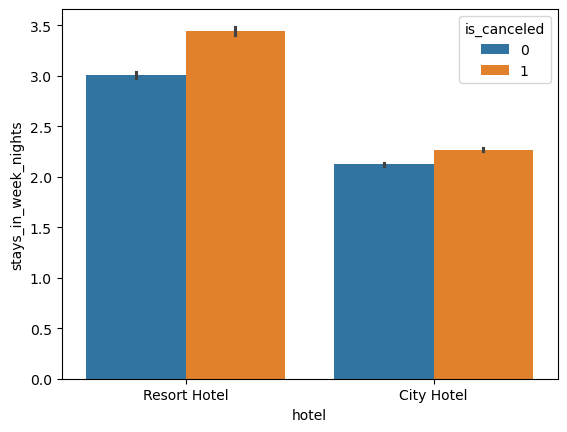

In [71]:
#week nights saty ratio more compared to weekend and low canceled ratio
sns.barplot(data=hc,x="hotel",y="stays_in_week_nights",hue="is_canceled")
plt.show()

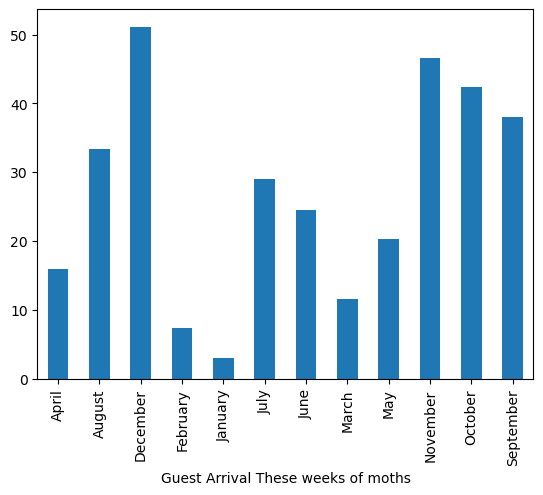

In [72]:
# most guest arrival in hotel in weeks of mooths
hc.groupby("arrival_date_month")["arrival_date_week_number"].mean().plot(kind="bar")
plt.xlabel("Guest Arrival These weeks of moths")
plt.show()

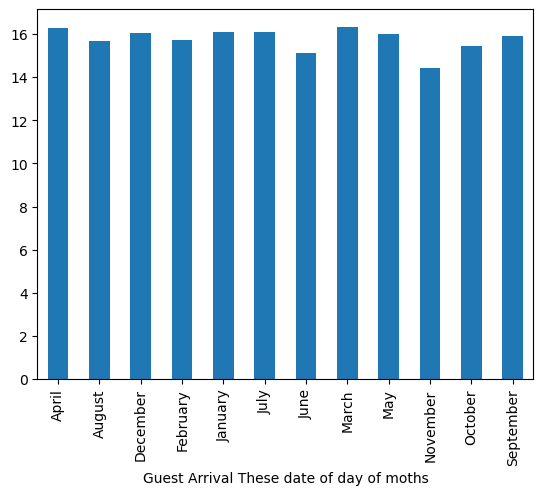

In [73]:
hc.groupby("arrival_date_month")["arrival_date_day_of_month"].mean().plot(kind="bar")
plt.xlabel("Guest Arrival These date of day of moths")
plt.show()

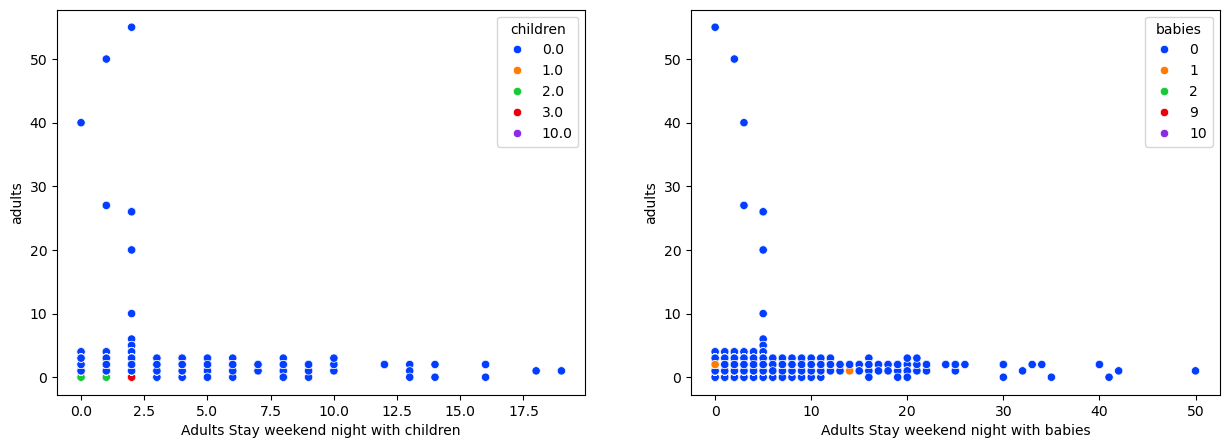

In [74]:
plt.figure(figsize=[15,5])

#here analysis those how stay iin weekend more then 3 day tye all does't have children 

plt.subplot(1,2,1)
sns.scatterplot(data=hc,x="stays_in_weekend_nights",y="adults",hue="children",palette="bright")
plt.xlabel("Adults Stay weekend night with children")


#here analysis Minor couples has babies
plt.subplot(1,2,2)
sns.scatterplot(data=hc,x="stays_in_week_nights",y="adults",hue="babies",palette="bright")
plt.xlabel("Adults Stay weekend night with babies")

plt.show()


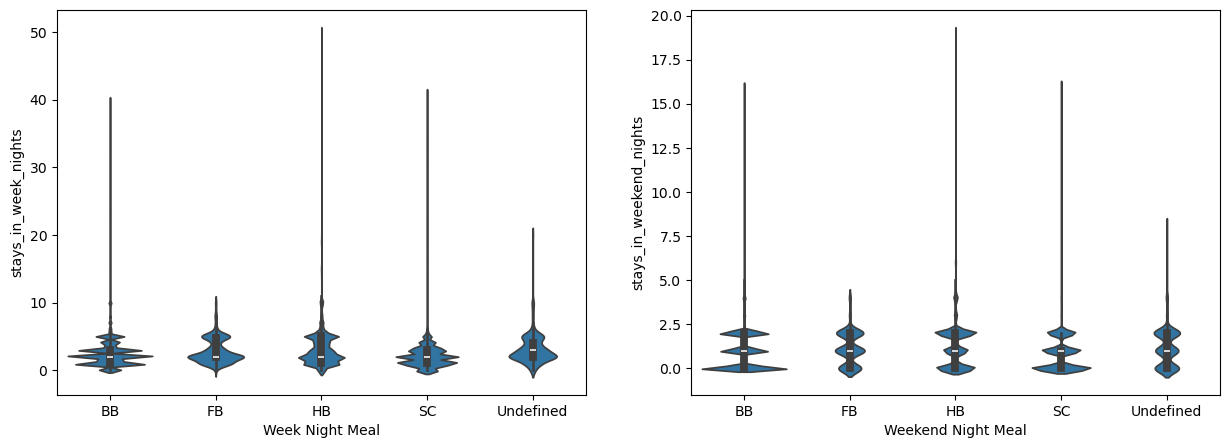

In [75]:
# Those Guest Are Came In Week Night and weekend They Mostly preferred Half Board  
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.violinplot(data=hc,x="meal",y="stays_in_week_nights")
plt.xlabel("Week Night Meal")


plt.subplot(1,2,2)
sns.violinplot(data=hc,x="meal",y="stays_in_weekend_nights")
plt.xlabel("Weekend Night Meal")
plt.show()

In [76]:
hc["country"].value_counts()

country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

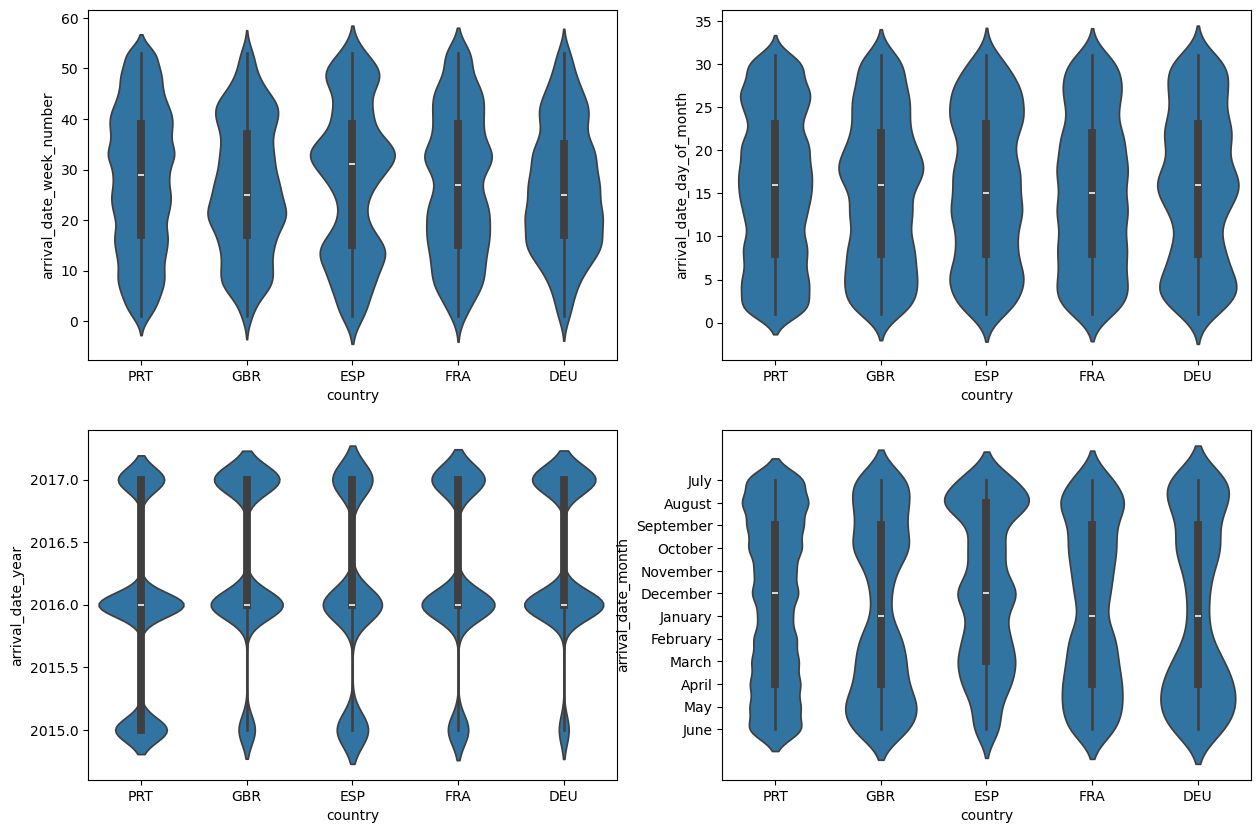

In [77]:
# these 5 country are more visiting hotel
new_country=["PRT","GBR","FRA","ESP","DEU"]

repeted=hc.loc[hc["country"].isin(new_country) & hc["arrival_date_week_number"]]

plt.figure(figsize=[15,10])

plt.subplot(2,2,1)
sns.violinplot(x=repeted["country"],y=repeted["arrival_date_week_number"])
plt.subplot(2,2,2)
sns.violinplot(x=repeted["country"],y=repeted["arrival_date_day_of_month"])
plt.subplot(2,2,3)
sns.violinplot(x=repeted["country"],y=repeted["arrival_date_year"])
plt.subplot(2,2,4)
sns.violinplot(x=repeted["country"],y=repeted["arrival_date_month"])
plt.show()

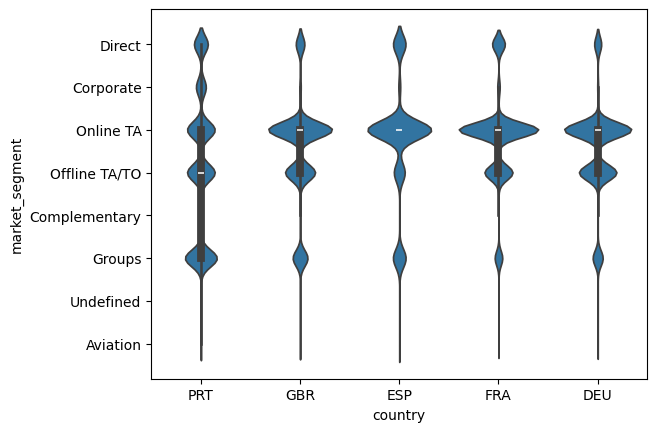

In [78]:
#Guest Booking Through This ways more OT throug book
new_country=["PRT","GBR","FRA","ESP","DEU"]

repeted=hc.loc[hc["country"].isin(new_country) & hc["market_segment"]]

sns.violinplot(x=repeted["country"],y=repeted["market_segment"])
plt.show()

In [79]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

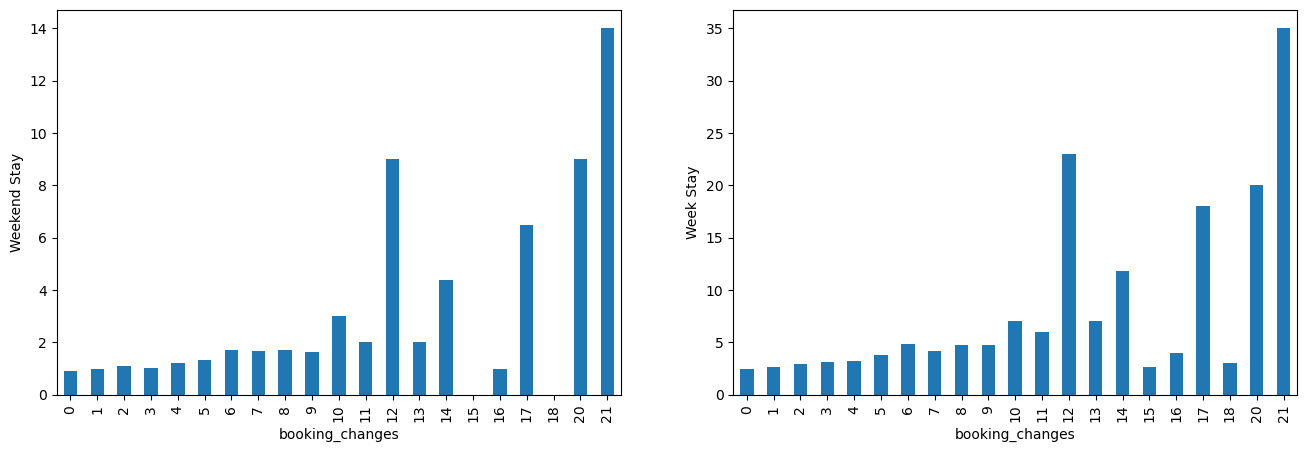

In [80]:
#here those who has group of people they chnage more time

plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
hc.groupby("booking_changes")["stays_in_weekend_nights"].mean().plot(kind="bar")
plt.ylabel("Weekend Stay")
plt.subplot(1,2,2)
hc.groupby("booking_changes")["stays_in_week_nights"].mean().plot(kind="bar")
plt.ylabel("Week Stay")
plt.show()


In [81]:
hc["customer_type"].value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

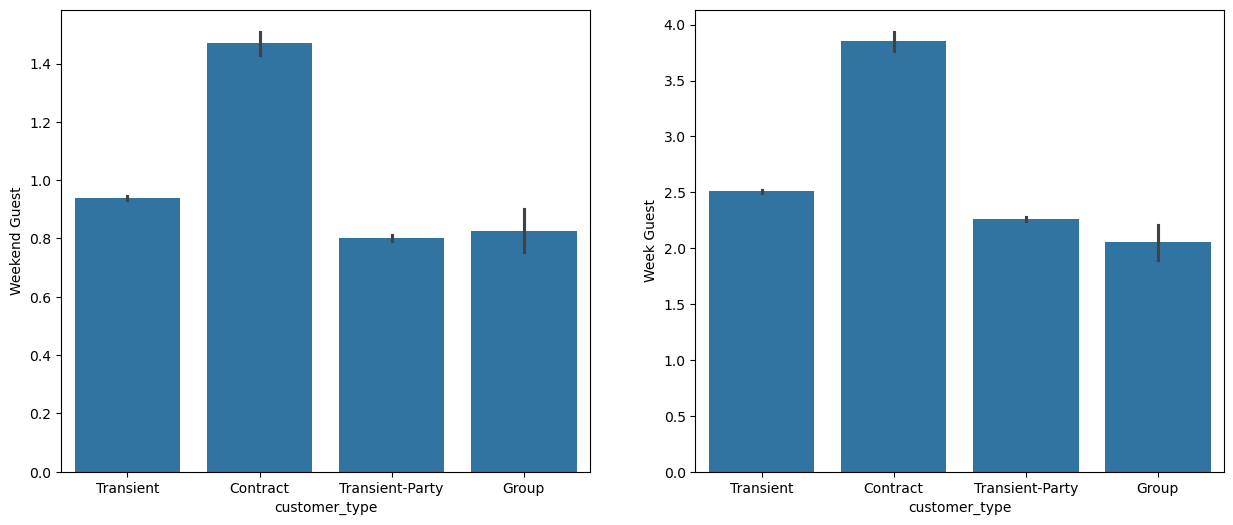

In [82]:
# weekend coustomer type

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.barplot(data=hc,x="customer_type",y="stays_in_weekend_nights")
plt.ylabel("Weekend Guest")

# weekend coustomer type
plt.subplot(1,2,2)
sns.barplot(data=hc,x="customer_type",y="stays_in_week_nights")
plt.ylabel("Week Guest")
plt.show()

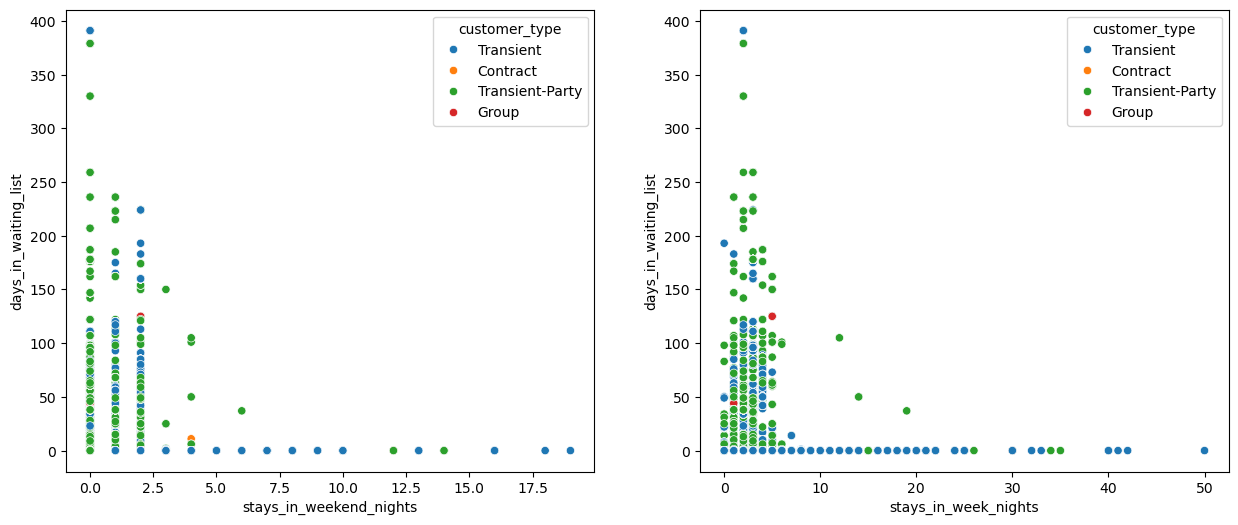

In [83]:
# more waiting in weekday 
plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
sns.scatterplot(data=hc,x="stays_in_weekend_nights",y="days_in_waiting_list",hue="customer_type")
plt.subplot(1,2,2)
sns.scatterplot(data=hc,x="stays_in_week_nights",y="days_in_waiting_list",hue="customer_type")

plt.show()

In [85]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

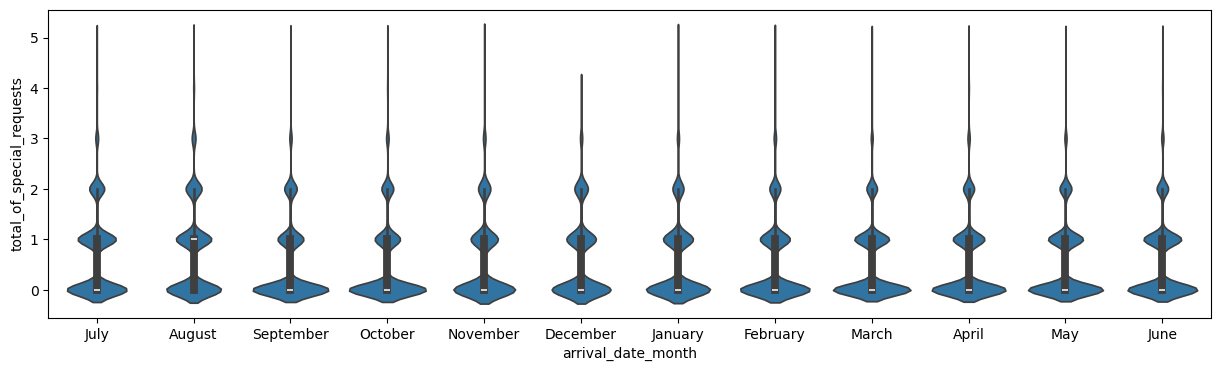

In [86]:
#mostly Guest Does not has more  1 & 2 requests 
plt.figure(figsize=[15,4])
sns.violinplot(data=hc,x="arrival_date_month",y="total_of_special_requests")
plt.show()

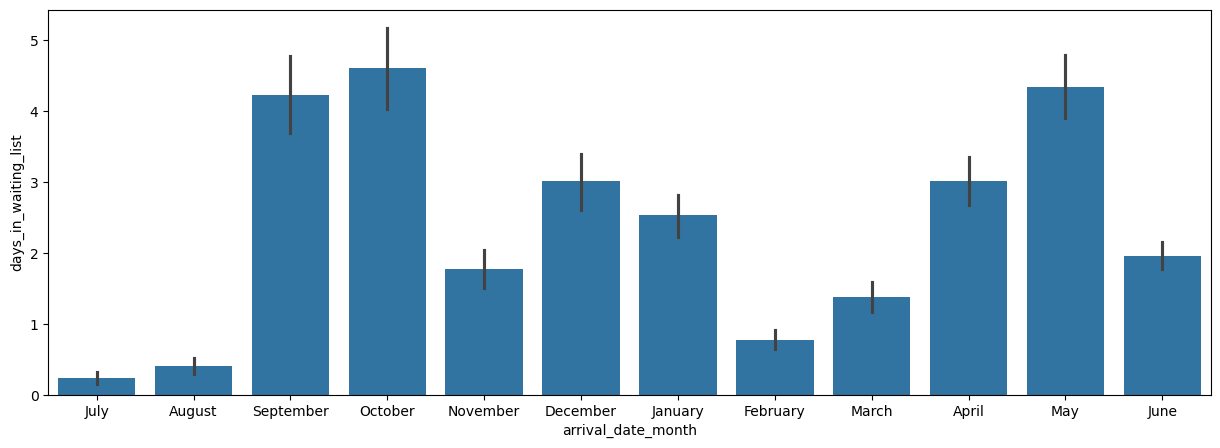

In [87]:
# wating more in sep and oct and may
plt.figure(figsize=[15,5])
sns.barplot(data=hc,x="arrival_date_month",y="days_in_waiting_list")
plt.show()

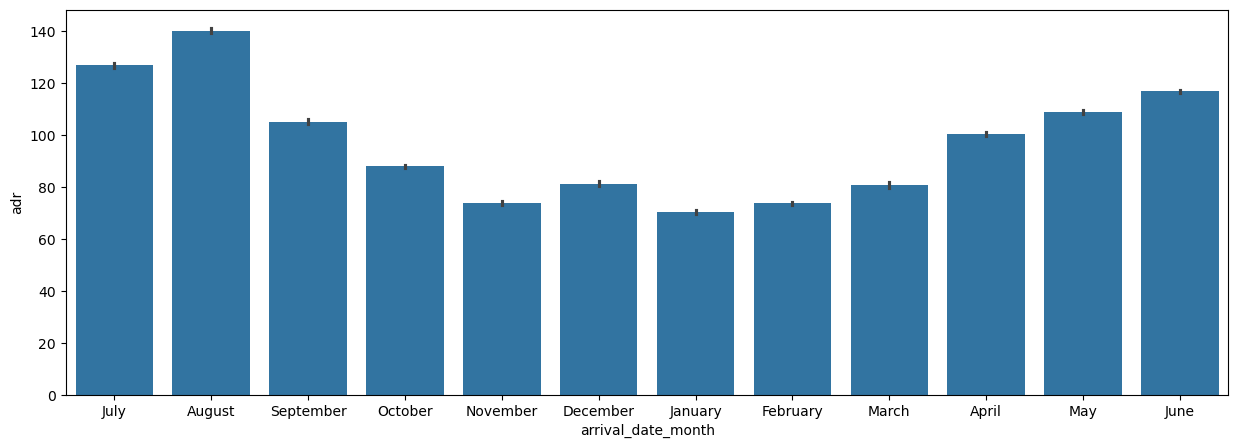

In [88]:
# per months revenue 
plt.figure(figsize=[15,5])
sns.barplot(data=hc,x="arrival_date_month",y="adr")
plt.show()

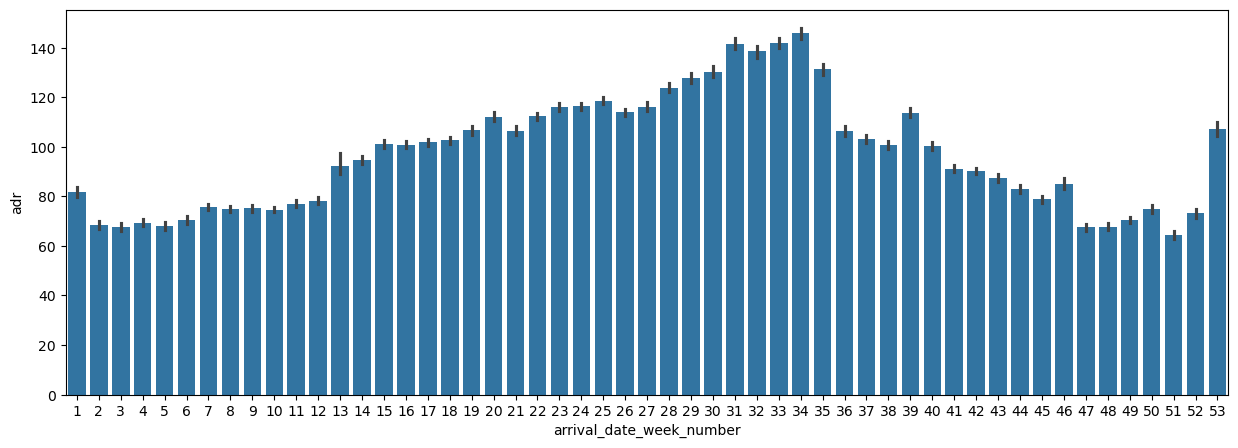

In [89]:
#per week revenue
plt.figure(figsize=[15,5])
sns.barplot(data=hc,x="arrival_date_week_number",y="adr")
plt.show()

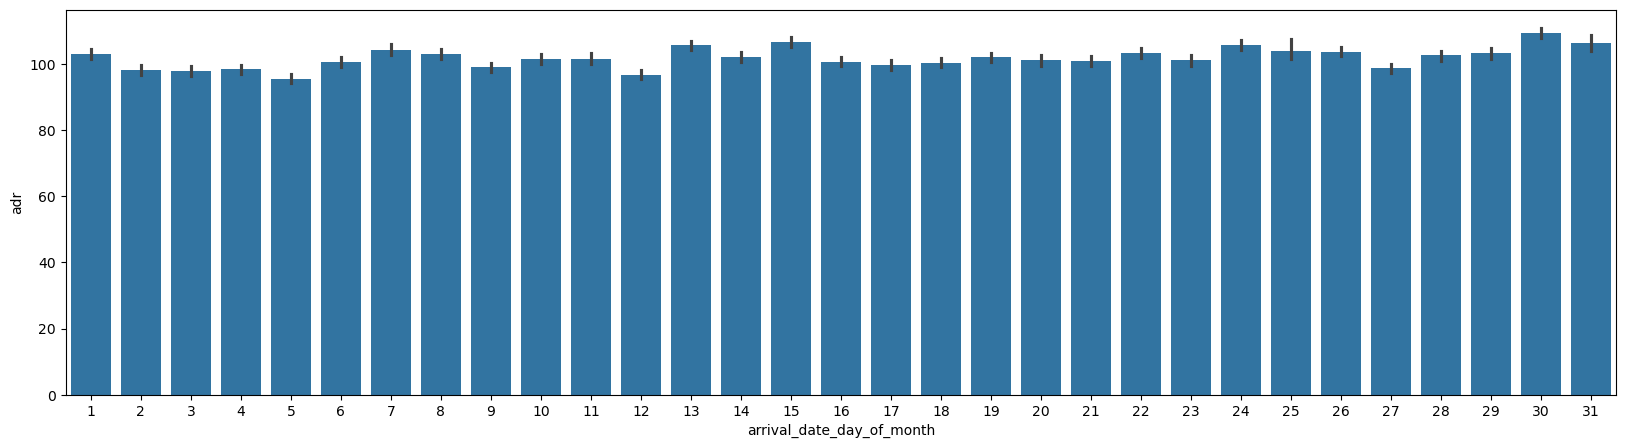

In [90]:
#earning by each day
plt.figure(figsize=[20,5])
sns.barplot(data=hc,x="arrival_date_day_of_month",y="adr")
plt.show()

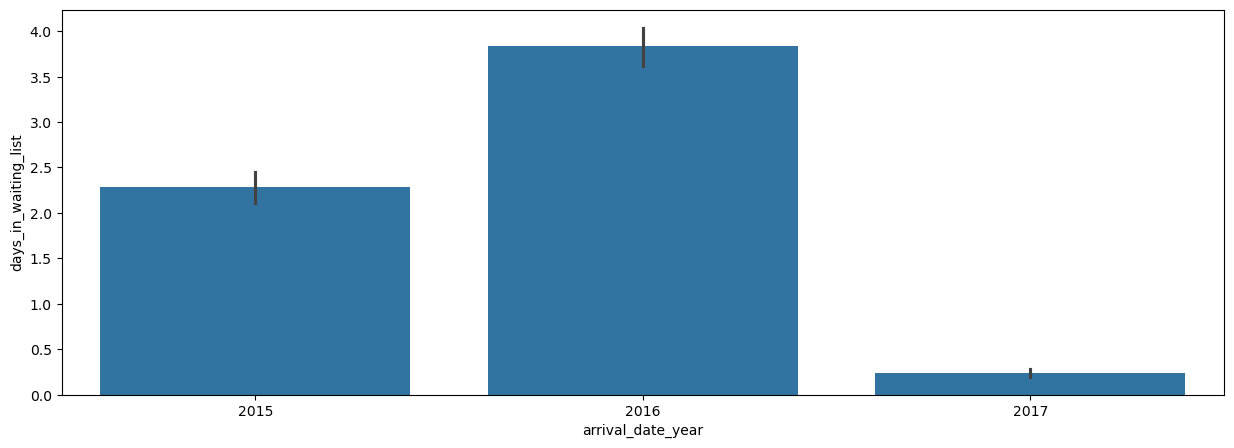

In [91]:
plt.figure(figsize=[15,5])
sns.barplot(data=hc,x="arrival_date_year",y="days_in_waiting_list")
plt.show()

In [92]:
hc.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,30.0,153.0,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,304.0,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,223.0,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,47.0,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,148.0,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [94]:
hc["reservation_status_date"]=pd.to_datetime(hc["reservation_status_date"],format="%d/%m/%Y")

In [95]:
hc["reservation_status_Months"]=pd.to_datetime(hc["reservation_status_date"]).dt.month

In [96]:
hc["reservation_status_Days"]=pd.to_datetime(hc["reservation_status_date"]).dt.day

In [97]:
hc["reservation_status_Years"]=pd.to_datetime(hc["reservation_status_date"]).dt.year

In [99]:
hc.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_Months,reservation_status_Days,reservation_status_Years
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,1,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,1,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,3,2015


In [100]:
hc.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'reservation_status_Months', 'reservation_status_Days',
       'reservation_status_Years'],
      dtype='object')

In [101]:
hc_columns_new=['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
        'market_segment',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
        'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status',
       'reservation_status_Months', 'reservation_status_Days',
       'reservation_status_Years']

new_hc=pd.DataFrame(hc,columns=hc_columns_new)

In [102]:
new_hc

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_Months,reservation_status_Days,reservation_status_Years
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,7,1,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,7,1,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,7,2,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,7,2,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,7,3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,9,6,2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,9,7,2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,9,7,2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,9,7,2017


In [103]:
hc["market_segment"].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [104]:
hc["customer_type"].value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

# OneHotEncoder

In [106]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

# one hot encoder
ohe=OneHotEncoder(drop='first',sparse_output=False)

new_ohe=ohe.fit_transform(hc[["hotel","market_segment","deposit_type","reservation_status","customer_type","reserved_room_type"]])

new_ohe1=pd.DataFrame(new_ohe,columns=ohe.get_feature_names_out())

new_ohe1

,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_Non Refund,deposit_type_Refundable,...,customer_type_Transient-Party,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119386,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
119387,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
119388,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
hc1=pd.concat([new_hc,new_ohe1],axis=1)

In [108]:
hc1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'market_segment', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_Months', 'reservation_status_Days',
       'reservation_status_Years', 'hotel_Resort Hotel',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'reservation_status_Chec

In [109]:
# drop unnecesary column
hc1.drop(["hotel",'customer_type','market_segment','deposit_type','reservation_status'],axis=1,inplace=True)

hc1.drop(["reserved_room_type"],axis=1,inplace=True)

# OrdinalEncoder

In [111]:
ore=OrdinalEncoder()

new_ore=ore.fit_transform(hc1[["arrival_date_month"]])

hc1["arrival_date_month"]=pd.DataFrame(new_ore,columns=['arrival_date_month'])

# Spliting

In [115]:
x=hc1.drop(["is_canceled"],axis=1)

In [116]:
y=hc1["is_canceled"]

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8)

In [119]:
x_train

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,customer_type_Transient-Party,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P
53023,188,2016,6.0,25,15,0,2,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78168,224,2015,10.0,40,2,1,2,2,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51620,11,2016,8.0,22,23,1,0,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25877,180,2016,5.0,28,4,3,8,2,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88206,33,2016,0.0,18,29,2,2,2,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,96,2016,9.0,48,25,1,2,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72805,150,2017,1.0,32,7,1,1,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47603,1,2016,3.0,10,28,2,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111691,18,2017,8.0,19,13,0,1,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold

In [121]:
k=KFold(n_splits=5)

In [122]:
list=[LogisticRegression,DecisionTreeClassifier,SVC,RandomForestClassifier,KNeighborsClassifier]

In [120]:

for i in list:
    model=i()
    print(model)
    print(cross_val_score(model,x_train,y_train,cv=k).mean())



LogisticRegression()
0.8805598586299735
DecisionTreeClassifier()
1.0
SVC()
0.6650051215940084
RandomForestClassifier()
1.0
KNeighborsClassifier()
0.8174467889184139


In [405]:
#sacling
from sklearn.preprocessing import StandardScaler

rs=StandardScaler()

saclin_train=rs.fit_transform(x_train)

saclin_test=rs.fit_transform(x_test)

In [122]:

for i in list:
    model=i()
    print(model)
    print(cross_val_score(model,saclin_train,y_train,cv=k).mean())

LogisticRegression()
1.0
DecisionTreeClassifier()
1.0
SVC()
0.9982410218632429
RandomForestClassifier()
1.0
KNeighborsClassifier()
0.9749977987669587


# RandomForestClassifier

In [409]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_depth=5, min_samples_split=40, n_estimators=150)

rf.fit(x_train,y_train)

rf.score(x_train,y_train)

rf.score(x_test,y_test)

1.0

In [215]:
from sklearn.model_selection import RandomizedSearchCV

dic={
    "n_estimators":[50,150,200,300],
    "max_depth":[5,15,20,25,10],
    "min_samples_split":[10,20,30,40]
}



In [217]:
gcv=RandomizedSearchCV(rf,param_distributions=dic,cv=k,n_jobs=-1)

In [219]:
gcv.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(max_depth=300,
                                                    min_samples_split=150,
                                                    n_estimators=200),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 15, 20, 25, 10],
                                        'min_samples_split': [10, 20, 30, 40],
                                        'n_estimators': [50, 150, 200, 300]})

In [220]:
gcv.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_split=40, n_estimators=150)

# metrics

In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [135]:
accuracy_score(y_test,rf.predict(x_test))

1.0

In [136]:
confusion_matrix(y_test,rf.predict(x_test))

array([[60130,     0],
       [    0, 35382]], dtype=int64)

<Axes: >

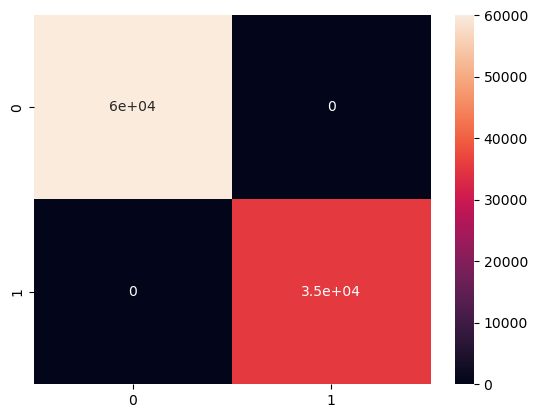

In [137]:
sns.heatmap(confusion_matrix(y_test,rf.predict(x_test)),annot=True)

In [138]:
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60130
           1       1.00      1.00      1.00     35382

    accuracy                           1.00     95512
   macro avg       1.00      1.00      1.00     95512
weighted avg       1.00      1.00      1.00     95512



In [411]:
from sklearn.linear_model import Ridge

In [354]:
la= Ridge(alpha=1200)

In [356]:
la.fit(x_train,y_train)

Ridge(alpha=1200)

In [358]:
la.score(x_train,y_train)

0.9639787595776617

In [360]:
la.score(x_test,y_test)

0.9637086696769182

# LogisticRegression

In [144]:
from sklearn.linear_model import LogisticRegression

In [233]:
lr=LogisticRegression(penalty='l2')

In [235]:
lr.fit(x_train,y_train)

LogisticRegression()

In [236]:
lr.score(x_train,y_train)

0.8423234776781975

In [239]:
lr.score(x_test,y_test)

0.8441766479604657